# Program Curriculum Design

In [5]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import re
import csv
import os
import matplotlib.pyplot as plt
import seaborn as sb

from time import sleep

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Clustering of skills

Use hierachircal clustering to cluster the skills identified above. Each cluster could potentially represent closely related skills according to the dataset. Thus, the clusters can be used as topic (or give an idea of  topic) that can be added on the curriculum and elements of the cluster can inform the subtopics. (or something along these lines)

### Kaggle data

In [36]:
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as sch
from scipy import zeros as sci_zeros
from scipy.spatial.distance import euclidean
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

%matplotlib inline

In [82]:
kaggle_skills = pd.read_csv('kaggle_skills.csv') 
kaggle_skills = kaggle_skills.drop(['Unnamed: 0'], axis=1)

In [91]:
kaggle_skills.shape

(19717, 89)

In [85]:
df=kaggle_skills.T
cos_similarity_matrix=df.dot(df.T)

Text(0.5, 1.0, 'Hierarchical clustering of Kaggle skills ')

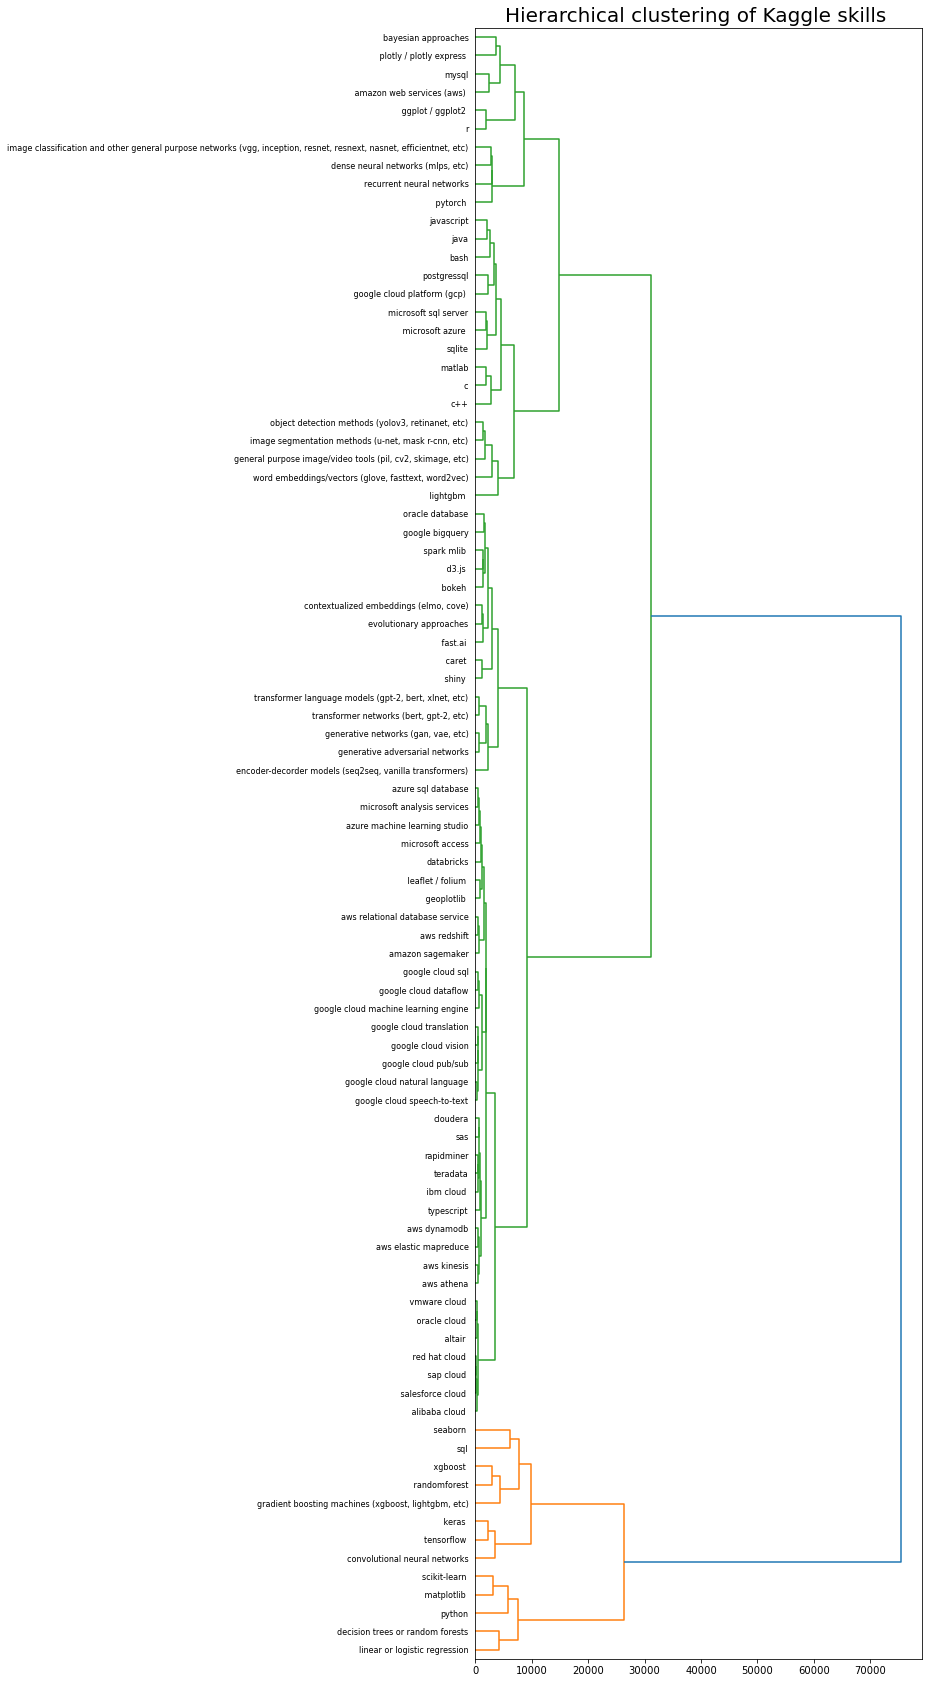

In [92]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import pairwise_distances

Z = linkage(cos_similarity_matrix, method='ward', metric='euclidean')
fig = plt.figure(figsize=(8, 30))

# First define the leaf label function.
n=kaggle_skills.shape[1]
labels=cos_similarity_matrix.columns.values.tolist()
def llf(id):
    if id < n:
        return labels[id]

# The text for the leaf nodes is going to be big so force
# a rotation of 90 degrees.
dendrogram(Z, orientation='right', leaf_label_func=llf,leaf_font_size=8)

plt.title("Hierarchical clustering of Kaggle skills ",fontsize=20)

### Indeed

In [8]:
data = pd.read_csv('indeed_skills.csv')
data = data.drop(['Unnamed: 0'], axis=1)
indeed_skills = data.drop(['employer', 'link', 'location', 'position_title', 'salary', 'description'], axis=1)
indeed_skills.head()

,google app engine,amazon comprehend,azure face api,google cloud automl,prophet,cntk,aws batch,shiny,google cloud datastore,jupyter/ipython,...,rapidminer,aws elastic mapreduce,google cloud video intelligence api,microsoft analysis services,dataversity,ibm cloud virtual servers,keras,ggplot2,google cloud sql,google colab
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


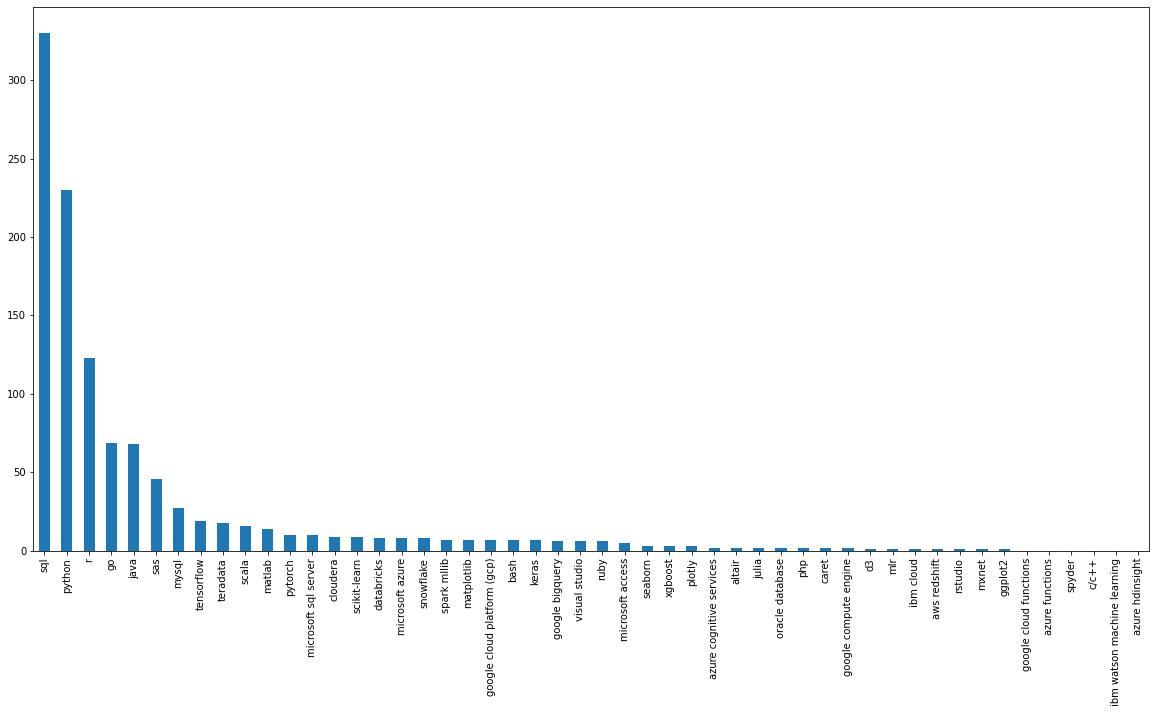

In [9]:
# Visualize the frequency of the skills in indeed job postings
plt.figure(figsize=(20,10))
ax = indeed_skills.sum().sort_values(ascending=False)[:50].plot(kind="bar")
plt.show()

In [10]:
# Try for indeed skills

#Remove skills that are not found in indeed job postings
indeed_df = indeed_skills.drop(columns=indeed_skills.columns[indeed_skills.sum()==0])
indeed_df.head()

,r,mysql,spark mllib,php,seaborn,plotly,databricks,xgboost,bash,pytorch,...,go,microsoft access,d3,scala,visual studio,snowflake,java,ibm cloud,keras,ggplot2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
indeed_df['r'].value_counts()

0.0    1146
1.0     123
Name: r, dtype: int64

In [17]:
indeed_df.values

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfTran = TfidfTransformer()

tfidf_matrix = tfidfTran.fit_transform(indeed_df.values)
tfidf_matrix

<1269x44 sparse matrix of type '<class 'numpy.float64'>'
	with 1110 stored elements in Compressed Sparse Row format>

In [42]:
tfidf=pd.DataFrame(tfidf_matrix.toarray(),columns=indeed_df.columns)

In [94]:
df=tfidf.T
cos_similarity_matrix=df.dot(df.T)

In [96]:
df=indeed_df.T
cos_similarity_matrix=df.dot(df.T)

Text(0.5, 1.0, 'Hierarchical clustering of Indeed skills ')

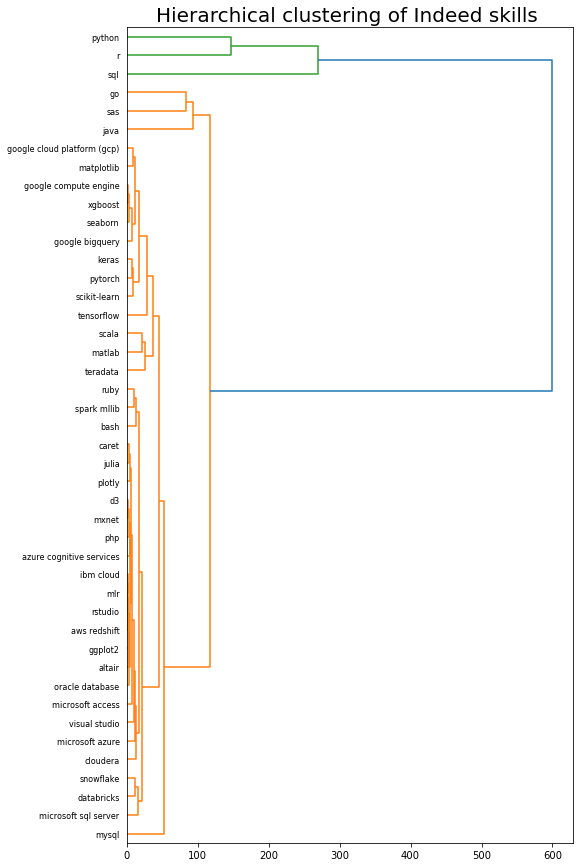

In [97]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import pairwise_distances

# Method 'ward' requires the distance metric to be Euclidean
Z = linkage(cos_similarity_matrix, method='ward', metric='euclidean')
fig = plt.figure(figsize=(8, 15))

# First define the leaf label function.
n=50
labels=cos_similarity_matrix.columns.values.tolist()
def llf(id):
    if id < n:
        return labels[id]
    else:
        return '[%d %d %1.2f]' % (id, count, R[n-id,3])
# The text for the leaf nodes is going to be big so force
# a rotation of 90 degrees.
dendrogram(Z, orientation='right', leaf_label_func=llf)

plt.title("Hierarchical clustering of Indeed skills ",fontsize=20)

## k-means clustering

In [119]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [100]:
tfidfTran = TfidfTransformer(norm=None)

tf_idf= tfidfTran.fit_transform(kaggle_skills.values)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()
tf_idf_array

array([[0.20029316, 0.34454841, 0.29503565, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.19163095, 0.        , 0.28227604, ..., 0.        , 0.        ,
        0.        ]])

In [103]:
pd.DataFrame(tf_idf_array, columns=kaggle_skills.columns).head()

,python,r,sql,c,c++,java,javascript,typescript,bash,matlab,...,mysql,postgressql,sqlite,microsoft sql server,oracle database,microsoft access,aws relational database service,aws dynamodb,azure sql database,google cloud sql
0,0.200293,0.344548,0.295036,0.0,0.0,0.443343,0.449213,0.0,0.000000,0.499719,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.106091,0.182500,0.156274,0.0,0.0,0.000000,0.000000,0.0,0.242769,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.350132,0.0
4,0.186980,0.000000,0.275425,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


Determine number of cluster. Too little and we could be grouping data together that have significant differences. Too many clusters and we will just be overfitting the data and our results will not generalise well. To answer this question we will use the elbow method which is a common technique used for this task. It involves estimating the model using various numbers of clusters and calculating the negative of the within-cluster sum of squares for each number of clusters chosen using the score method from sklearn. We choose the number where adding further clusters only marginally increases the score. In this case, we decide to use 5

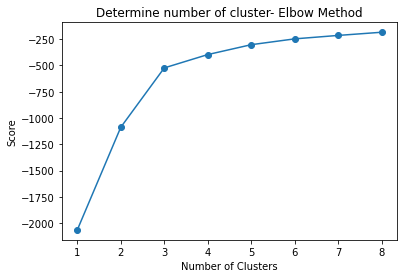

In [135]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)

number_clusters = range(1, 9)

kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters]
kmeans

score = [kmeans[i].fit(Y_sklearn).score(Y_sklearn) for i in range(len(kmeans))]
score

plt.plot(number_clusters, score,marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Determine number of cluster- Elbow Method')
plt.show()

In [182]:
#PCA reduce dimensionality to visualize clustering
# k-means clustering
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
kmeans = KMeans(n_clusters=6, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

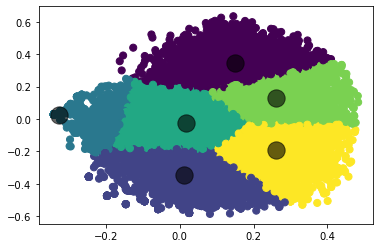

In [183]:
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=prediction, s=50, cmap='viridis')

centers = fitted.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);


In [184]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = kaggle_skills.columns.values
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs
dfs = get_top_features_cluster(tf_idf_array, prediction, 15)

In [185]:
dfs

[                                             features     score
 0                       convolutional neural networks  0.206646
 1   image classification and other general purpose...  0.183646
 2                                         tensorflow   0.155213
 3                                              keras   0.153860
 4   general purpose image/video tools (pil, cv2, s...  0.145294
 5   image segmentation methods (u-net, mask r-cnn,...  0.143087
 6                                         matplotlib   0.140199
 7   object detection methods (yolov3, retinanet, etc)  0.138728
 8                                              python  0.134984
 9                                            pytorch   0.132010
 10                  dense neural networks (mlps, etc)  0.130296
 11                          recurrent neural networks  0.127317
 12                                      scikit-learn   0.108702
 13  word embeddings/vectors (glove, fasttext, word...  0.094966
 14                      

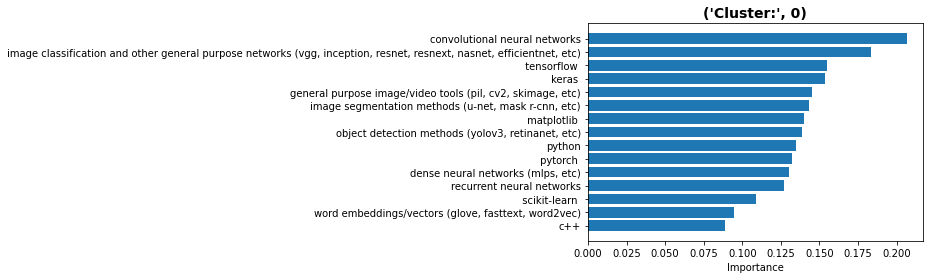

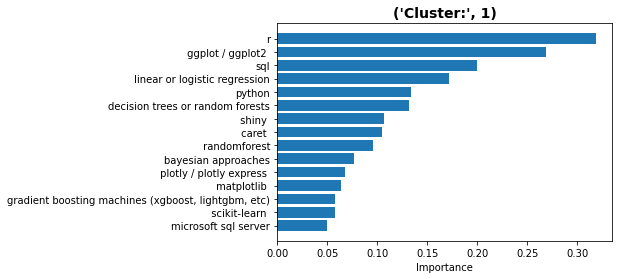

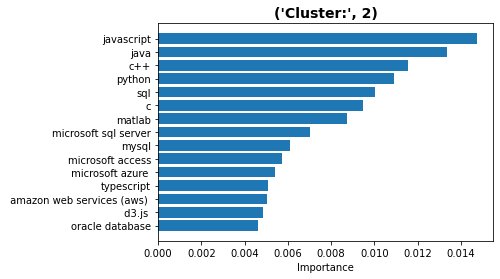

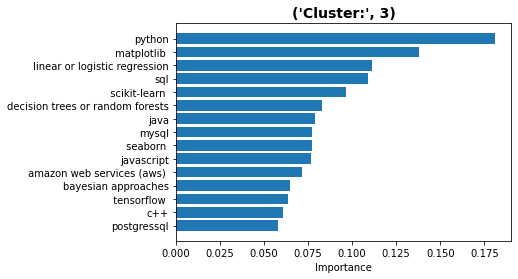

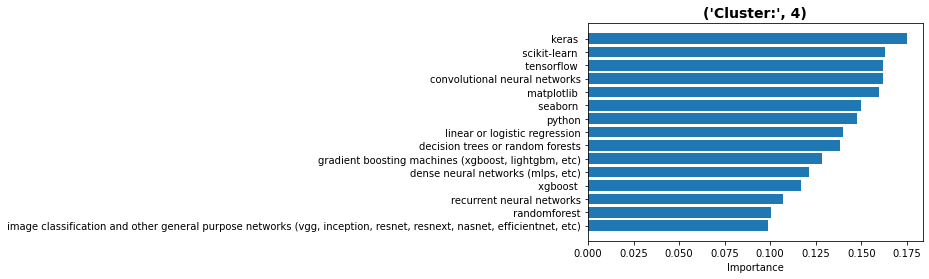

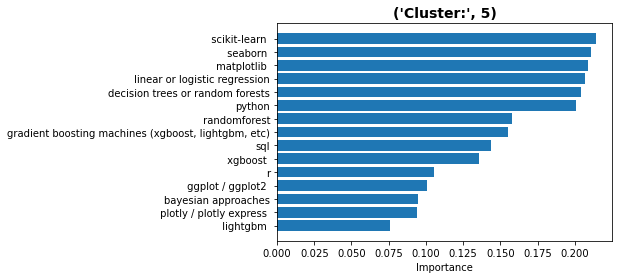

In [187]:


for i in range(0, 6):
    fig, ax = plt.subplots()
    df=dfs[i]
    ax.barh(df['features'],df['score'], align='center')
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Importance')
    ax.set_title(('Cluster:',i),fontsize=14, fontweight='bold')
    plt.show()

#Below are five graphs corresponding to the top 15 skills in each cluster ordered by relative importance as measured by TF-IDF.

#### Data Science program(Master of Data Science and Artificial Intelligence) curriculum design:

* Cluster 0: Neural Networks and Deep Learning (Neural network, Tensorflow, keras)

* Cluster 1: Machine learning algorithm(supervised learning, unsupervised learning algorithms)

* Cluster 2: Analytical Tools and Techniques(python, java, c, matlab, c++, r, SQL)

* Cluster 3: Data acquisition and management (Data structure, web-scraping, API, SQL, noSQL,keras)

* Cluster 4:  Artificial Intelligence (focus on the important foundations of AI, such as knowledge representation and reasoning)

* Cluster 5: Structuring and Visualizing Data for Analytics 